# SQL Alchemy Challenge

In [1]:
#Starter info

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Dependencies

import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

Base = automap_base()

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
#Reflect the tables

Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#Retrieve the columns for each table

from sqlalchemy import inspect
Inspector = inspect(engine)

In [11]:
Inspector.get_table_names()

['measurement', 'station']

In [12]:
Measurement_columns = Inspector.get_columns('measurement')
print("Measurement")
for c in Measurement_columns:
    print(c['name'], c["type"])
    
Station_columns = Inspector.get_columns('station')
print("Stations")
for c in Station_columns:
    print(c['name'], c["type"])

Measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Stations
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#Find the last date in the data point

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [14]:
#Retrieve the last 12 months of data

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores

precip = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

precip_df = pd.DataFrame(precip, columns=['date','prcp'])
precip_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


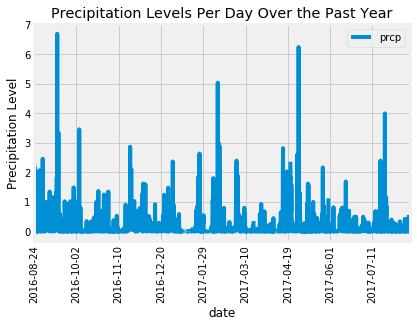

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data

#Sort the dataframe by date

precip_df.set_index('date',inplace=True)
precip_df = precip_df.sort_index()

#Graph a chart to show the precipitation levels by date

axis = precip_df.plot(rot=90);
axis.set_title("Precipitation Levels Per Day Over the Past Year");
axis.set_ylabel("Precipitation Level");

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
    
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset

active_station = session.query(func.count(Station.id)).all()
active_station

[(9)]

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)? List them in descending order

most_active =  session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [32]:
 # Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC00519281_data =  session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date > last_year).all()
USC00519281_data[:10]

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0)]

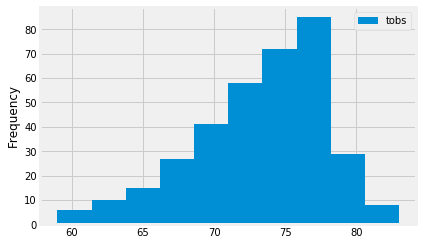

In [35]:
high_df = pd.DataFrame(USC00519281_data)
high_df.plot(kind ="hist");